#  Sampling & Likelihood Estimation

In [4]:
import sys
sys.path.append('..')
from tools.model import sample_run
from tools.tuning import get_run
from tools.constants import root_dir, data_path #full_data_path
from os.path import join
import pandas as pd

run_path=join(root_dir, 'tuning', 'test','blocks_20_hidden_128_A_relu_N_1500.json')
info = get_run(run_path)

In [5]:
from tools.model import sample_run
from tools.tuning import get_run
from tools.constants import root_dir, data_path #full_data_path
from os.path import join
import pandas as pd

In [6]:
df_NF = sample_run(r"D:\Black-Holes-Population-Studies\tuning\test\blocks_20_hidden_128_A_relu_N_1500.json", hyperparams=[0.001, 0.5], n_samples = 10000)
f_name='BHBHm.pq'
#df=pd.read_parquet(r"D:\Black-Holes-Population-Studies\notebooks\BHBHm.pq")
df=pd.read_parquet(r"D:\Black-Holes-Population-Studies\notebooks\BHBHm.pq")

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


{0.017, 0.03, 0.014, 0.0004, 0.0008, 0.01, 0.004, 0.008, 0.0002, 0.006, 0.02, 0.0006, 0.0001, 0.002, 0.001}


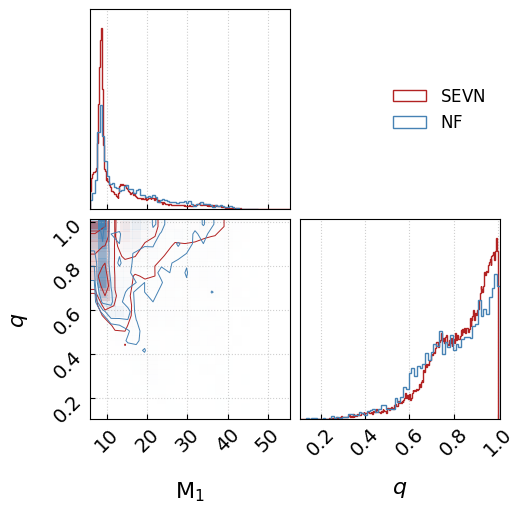

In [ ]:
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
from figaro import plot_settings
from figaro.transform import transform_from_probit, transform_to_probit

aa = 3.
zz = 1e-4

df_NF = sample_run(r"D:\Black-Holes-Population-Studies\tuning\test\blocks_20_hidden_128_A_relu_N_1500.json", hyperparams = [zz, aa], n_samples = 5000)
f_name='BHBHm.pq'
df=pd.read_parquet(r"D:\Black-Holes-Population-Studies\notebooks\BHBHm.pq")
#df=pd.read_parquet(r"D:\Black-Holes-Population-Studies\notebooks\mock_data.pq")

samples_nf = np.array(df_NF[['Mass_0','q']])

samples_nf = samples_nf[np.isfinite(samples_nf[:,1])]
#samples_sevn with alpha = 0.5 and Z = 0.02

#df = df[df['Z'] == zz] 
samples_sevn = np.array(df[['Mass_0','q']][df['alpha'] == aa])
samples_sevn_alpha_Z = np.array(df[['Mass_0','q','Z','alpha']])
print(set(samples_sevn_alpha_Z[:,2]))
#idx = (samples_nf[:,0]>0) & (samples_nf[:,1]>0) & (samples_nf[:,0]<100) & (samples_nf[:,1]<1.3)
#print(len(idx)-np.sum(idx))
#samples_nf = samples_nf[idx]
fig = corner(samples_sevn, color = 'firebrick', hist_kwargs={'density':True, 'label': '$\\mathrm{SEVN}$'}, hist_bin_factor=int(np.sqrt(len(samples_sevn)))/20, labels = ['$\\mathrm{M}_1$', '$q$'], plot_density = True, no_fill_contours = True, plot_datapoints = False)
fig = corner(samples_nf, color = 'steelblue', hist_kwargs={'density':True, 'label': '$\\mathrm{NF}$'}, hist_bin_factor=int(np.sqrt(len(samples_nf)))/20, labels = ['$\\mathrm{M}_1$', '$q$'], plot_density = True, no_fill_contours = True, plot_datapoints = False, fig = fig)
fig.axes[1].legend(loc = 5, *fig.axes[0].get_legend_handles_labels())

fig.savefig('M1_q_300.pdf', bbox_inches='tight')
plt.show()

# Constant Z and Diffenet alphas

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])
d:\Black-Ho

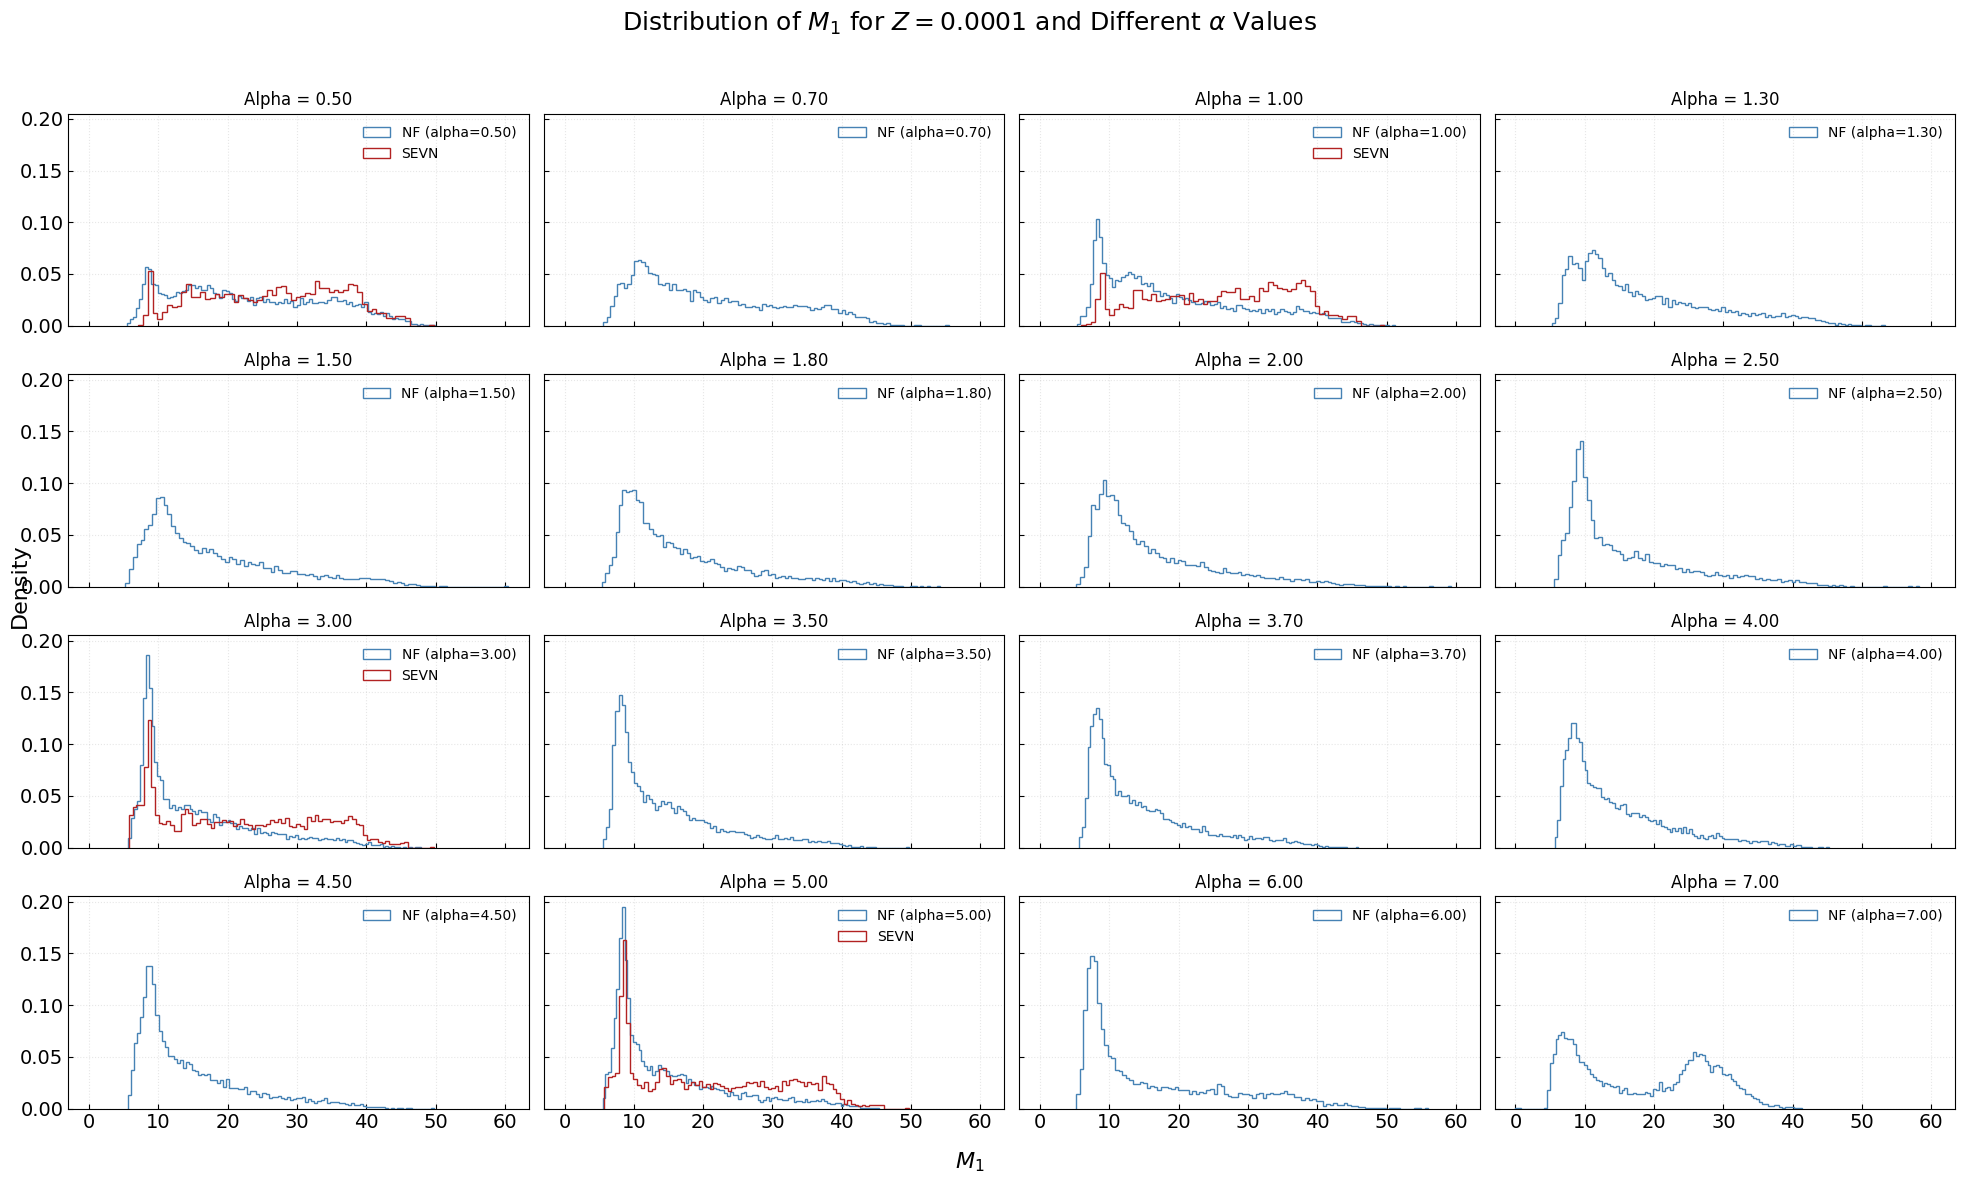

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# Define the range of alphas
alphas = [0.5, 0.7, 1., 1.3, 1.5, 1.8, 2., 2.5, 3., 3.5, 3.7, 4., 4.5, 5., 6., 7.]
alphas_SEVN = [0.5, 1., 3., 5.]

# Determine the grid size for subplots
n_cols = 4
n_rows = int(np.ceil(len(alphas) / n_cols))


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()  

Z = 0.0001
# Loop over each alpha
for i, alpha in enumerate(alphas):
   
    df_NF = sample_run(r"D:\Black-Holes-Population-Studies\tuning\test\blocks_20_hidden_128_A_relu_N_1500.json", 
                       hyperparams=[Z, alpha], n_samples=10000)
    samples_nf = np.array(df_NF[['Mass_0', 'q']])
    samples_nf = samples_nf[np.isfinite(samples_nf[:, 0])]

   
    mass_nf = samples_nf[:, 0]

    # Plot the Mass_0 distribution for NF with step histogram
    ax = axes[i]
    ax.hist(mass_nf, bins=int(np.sqrt(len(mass_nf))), density=True, histtype='step', color='steelblue', label=f'NF (alpha={alpha:.2f})')

    # If alpha matches one of the values in alphas_SEVN, add the SEVN distribution for the same alpha
    if alpha in alphas_SEVN:
        

        # Filter the samples for the current alpha and z=0.0001
        samples_sevn_alpha_restricted = samples_sevn_alpha_Z[(samples_sevn_alpha_Z[:, 2] == Z) & (samples_sevn_alpha_Z[:, 3] == alpha)]
        
        mass_sevn = samples_sevn_alpha_restricted[:,0]  # Extract `Mass_0` values for this alpha
        ax.hist(mass_sevn, bins=int(np.sqrt(len(mass_sevn))), density=True, histtype='step', color='firebrick', label='SEVN')

    # Add labels, title, and legend to each subplot
    ax.set_title(f'Alpha = {alpha:.2f}', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

# Adjust layout and add common labels
fig.supxlabel('$M_1$', fontsize=16)
fig.supylabel('Density', fontsize=16)
fig.suptitle('Distribution of $M_1$ for $Z=0.0001$ and Different $\\alpha$ Values', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title


for j in range(len(alphas), len(axes)):
    fig.delaxes(axes[j])

# Save the figure
plt.savefig('mass_0_distribution_subplots_filtered_sevn.pdf', bbox_inches='tight')
plt.show()




# Constant Alpha and Different Zs

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


[[1.78063200e+01 8.87644949e-01 1.00000000e-04 1.00000000e+00]
 [3.32487000e+01 7.73001952e-01 1.00000000e-04 1.00000000e+00]
 [2.45367600e+01 8.19168464e-01 1.00000000e-04 1.00000000e+00]
 ...
 [8.18945300e+00 7.83606549e-01 1.00000000e-04 1.00000000e+00]
 [8.65968400e+00 9.66743590e-01 1.00000000e-04 1.00000000e+00]
 [7.55355200e+00 7.55990294e-01 1.00000000e-04 1.00000000e+00]]


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


[[2.68553400e+01 8.79633995e-01 2.00000000e-04 1.00000000e+00]
 [2.34048800e+01 8.39343761e-01 2.00000000e-04 1.00000000e+00]
 [1.00491500e+01 5.96538314e-01 2.00000000e-04 1.00000000e+00]
 ...
 [3.89446300e+01 9.86664657e-01 2.00000000e-04 1.00000000e+00]
 [4.19810000e+01 9.98749434e-01 2.00000000e-04 1.00000000e+00]
 [3.46159500e+01 9.06829655e-01 2.00000000e-04 1.00000000e+00]]


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


[[2.25666100e+01 9.39400291e-01 4.00000000e-04 1.00000000e+00]
 [8.27893900e+00 7.57925985e-01 4.00000000e-04 1.00000000e+00]
 [9.48682700e+00 8.27605795e-01 4.00000000e-04 1.00000000e+00]
 ...
 [8.14997600e+00 7.62011569e-01 4.00000000e-04 1.00000000e+00]
 [1.84724100e+01 8.23419900e-01 4.00000000e-04 1.00000000e+00]
 [1.27103300e+01 6.89723477e-01 4.00000000e-04 1.00000000e+00]]


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


[[8.27285800e+00 7.74350049e-01 6.00000000e-04 1.00000000e+00]
 [1.12249000e+01 6.82644389e-01 6.00000000e-04 1.00000000e+00]
 [1.08231200e+01 5.30046974e-01 6.00000000e-04 1.00000000e+00]
 ...
 [2.99877100e+01 9.23082489e-01 6.00000000e-04 1.00000000e+00]
 [9.50999200e+00 6.81634433e-01 6.00000000e-04 1.00000000e+00]
 [8.25274600e+00 9.95117989e-01 6.00000000e-04 1.00000000e+00]]


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


[[8.27210100e+00 7.79140874e-01 8.00000000e-04 1.00000000e+00]
 [1.12976800e+01 6.72981532e-01 8.00000000e-04 1.00000000e+00]
 [1.07014100e+01 5.47715488e-01 8.00000000e-04 1.00000000e+00]
 ...
 [8.20570700e+00 8.34730633e-01 8.00000000e-04 1.00000000e+00]
 [2.31802300e+01 9.45331431e-01 8.00000000e-04 1.00000000e+00]
 [1.90754400e+01 5.06914860e-01 8.00000000e-04 1.00000000e+00]]


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


[[8.27182600e+00 7.85353439e-01 1.00000000e-03 1.00000000e+00]
 [1.07690900e+01 7.13160815e-01 1.00000000e-03 1.00000000e+00]
 [1.05635500e+01 5.50469397e-01 1.00000000e-03 1.00000000e+00]
 ...
 [1.51470300e+01 6.31306335e-01 1.00000000e-03 1.00000000e+00]
 [2.53405200e+01 8.11171594e-01 1.00000000e-03 1.00000000e+00]
 [2.69059600e+01 9.16456800e-01 1.00000000e-03 1.00000000e+00]]


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


[[8.31928300e+00 7.15965667e-01 2.00000000e-03 1.00000000e+00]
 [1.17474700e+01 8.59226710e-01 2.00000000e-03 1.00000000e+00]
 [8.22080600e+00 7.79042590e-01 2.00000000e-03 1.00000000e+00]
 ...
 [8.48901900e+00 8.04923396e-01 2.00000000e-03 1.00000000e+00]
 [1.64332300e+01 6.85633926e-01 2.00000000e-03 1.00000000e+00]
 [1.32706700e+01 9.87728577e-01 2.00000000e-03 1.00000000e+00]]


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


[[1.23565000e+01 9.72444462e-01 4.00000000e-03 1.00000000e+00]
 [7.99111800e+00 9.57504194e-01 4.00000000e-03 1.00000000e+00]
 [7.37941100e+00 9.00014242e-01 4.00000000e-03 1.00000000e+00]
 ...
 [8.49829800e+00 9.01060424e-01 4.00000000e-03 1.00000000e+00]
 [1.05600300e+01 8.00468086e-01 4.00000000e-03 1.00000000e+00]
 [6.43900100e+00 9.06407376e-01 4.00000000e-03 1.00000000e+00]]


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


[[8.40341700e+00 9.95864777e-01 6.00000000e-03 1.00000000e+00]
 [6.51385000e+00 8.94097193e-01 6.00000000e-03 1.00000000e+00]
 [8.53590600e+00 9.25909212e-01 6.00000000e-03 1.00000000e+00]
 ...
 [1.58509700e+01 9.56826617e-01 6.00000000e-03 1.00000000e+00]
 [7.95094500e+00 9.05467212e-01 6.00000000e-03 1.00000000e+00]
 [8.45954200e+00 7.11519607e-01 6.00000000e-03 1.00000000e+00]]


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


[[7.99577000e+00 9.28297212e-01 8.00000000e-03 1.00000000e+00]
 [7.68129300e+00 8.08138161e-01 8.00000000e-03 1.00000000e+00]
 [7.55032900e+00 7.58295168e-01 8.00000000e-03 1.00000000e+00]
 ...
 [8.02690100e+00 9.35398854e-01 8.00000000e-03 1.00000000e+00]
 [7.68737000e+00 8.65034075e-01 8.00000000e-03 1.00000000e+00]
 [7.78545200e+00 9.68338511e-01 8.00000000e-03 1.00000000e+00]]


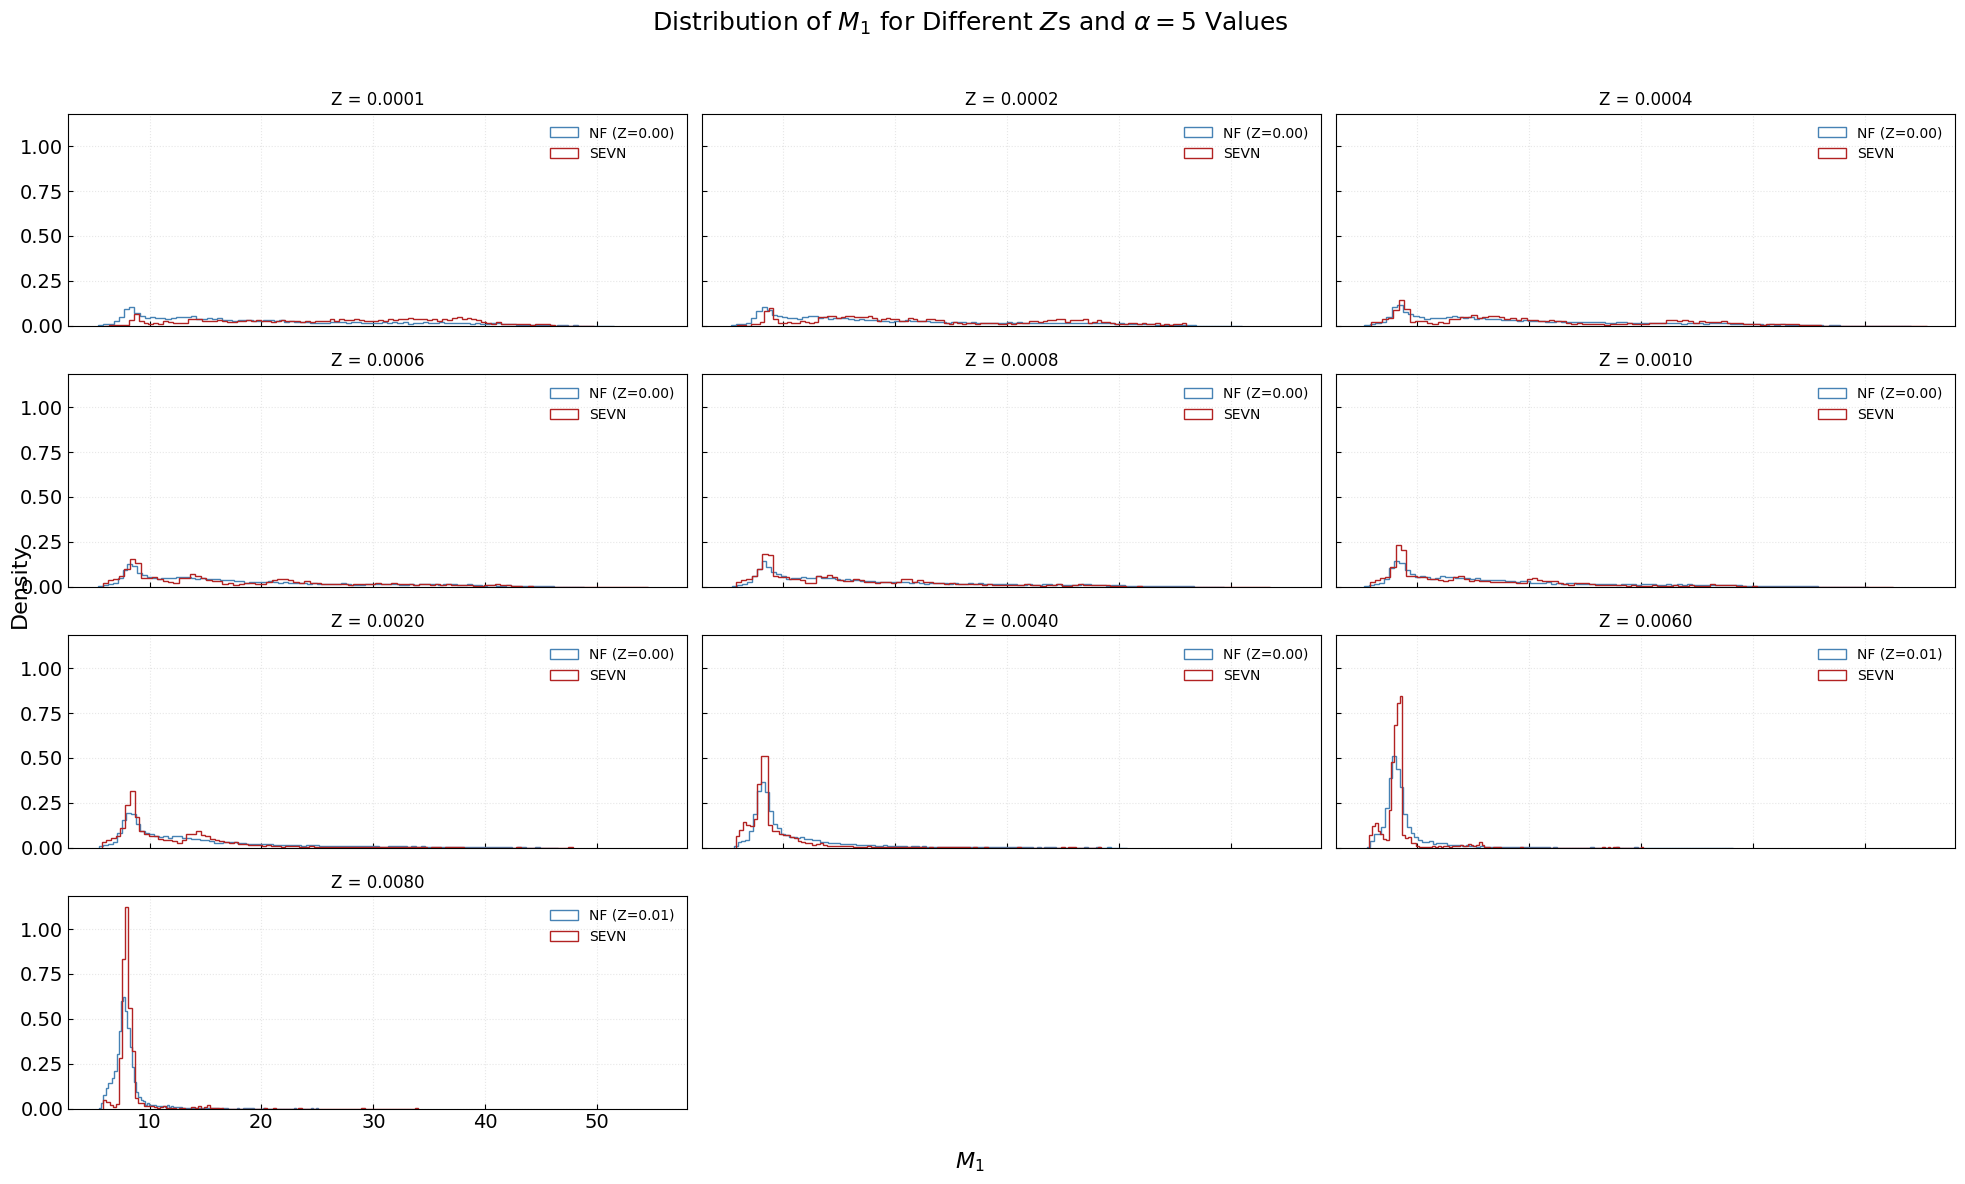

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Define the range of alphas
Zs =[0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008]
#Zs_SEVN = Zs =[0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008]

# Determine the grid size for subplots
n_cols = 3
n_rows = int(np.ceil(len(Zs) / n_cols))

# Create a figure for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten axes for easier indexing

# Loop over each alpha
for i, Z in enumerate(Zs):
    # Run the sample generation and transformation for NF
    df_NF = sample_run(r"D:\Black-Holes-Population-Studies\tuning\test\blocks_20_hidden_128_A_relu_N_1500.json", 
                       hyperparams=[Z, 1.], n_samples=10000)
    samples_nf = np.array(df_NF[['Mass_0', 'q']])
    samples_nf = samples_nf[np.isfinite(samples_nf[:, 0])]

    # Extract the Mass_0 values for NF
    mass_nf = samples_nf[:, 0]

    
    ax = axes[i]
    ax.hist(mass_nf, bins=100, density=True, histtype='step', color='steelblue', label=f'NF (Z={Z:.2f})')

    # If Z matches one of the values in Zs_SEVN, add the SEVN distribution for the same Z
    #if Z in Zs_SEVN:
        
    # Filter the samples for the current alpha and z=0.0001
    samples_sevn_Z_restricted = samples_sevn_alpha_Z[(samples_sevn_alpha_Z[:, 2] == Z) & (samples_sevn_alpha_Z[:, 3] == 1.)]
        
    mass_sevn = samples_sevn_Z_restricted[:, 0]  # Extract `Mass_0` values for this Z
        #if len(mass_sevn)>0:
    ax.hist(mass_sevn, bins=100, density=True, histtype='step', color='firebrick', label='SEVN')

    # Add labels, title, and legend to each subplot
    ax.set_title(f'Z = {Z:.4f}', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)


fig.supxlabel('$M_1$', fontsize=16)
fig.supylabel('Density', fontsize=16)
fig.suptitle('Distribution of $M_1$ for Different $Z$s and $\\alpha=5$ Values', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title

# Remove extra subplots if any
for j in range(len(Zs), len(axes)):
    fig.delaxes(axes[j])

# Save the figure
plt.savefig('mass_0_distribution_subplots_filtered_Zs.pdf', bbox_inches='tight')
plt.show()




d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


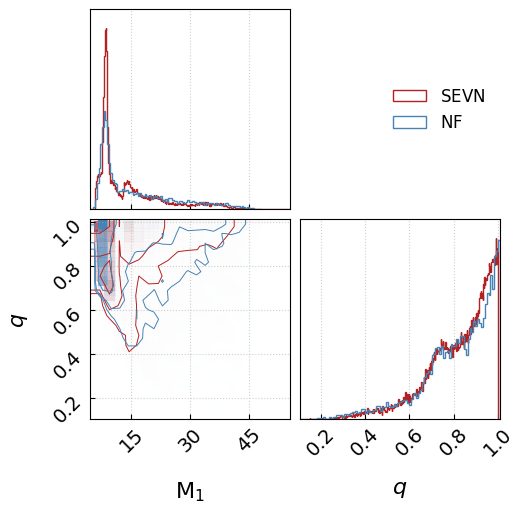

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


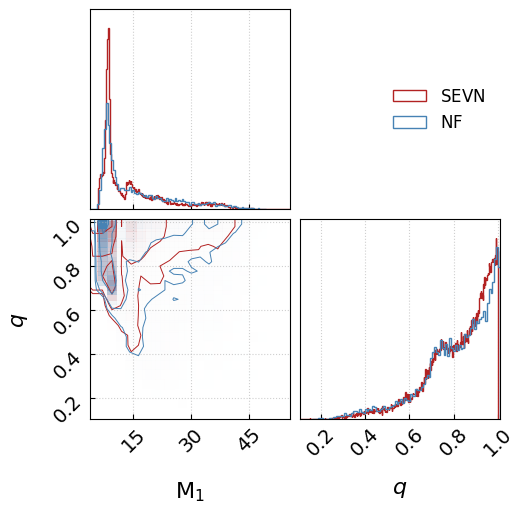

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


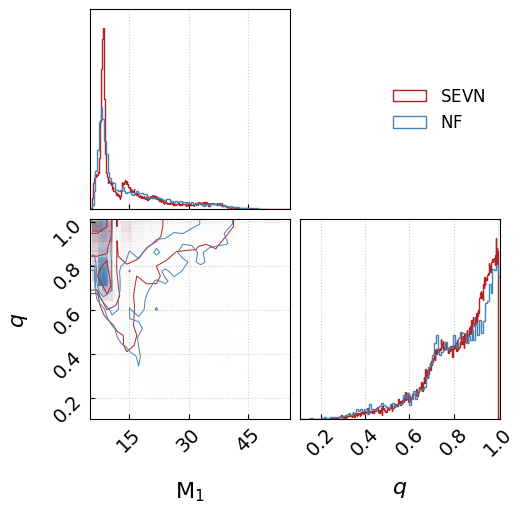

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


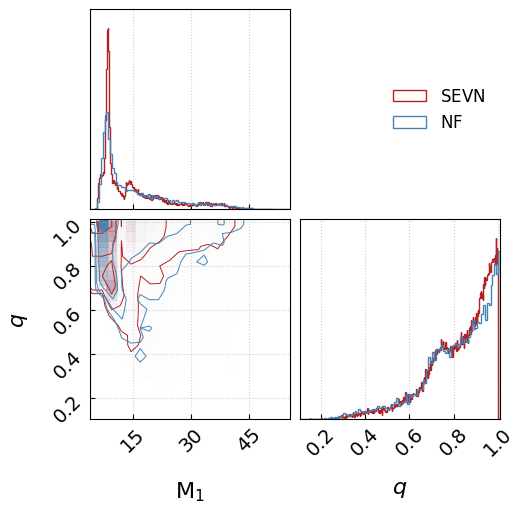

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


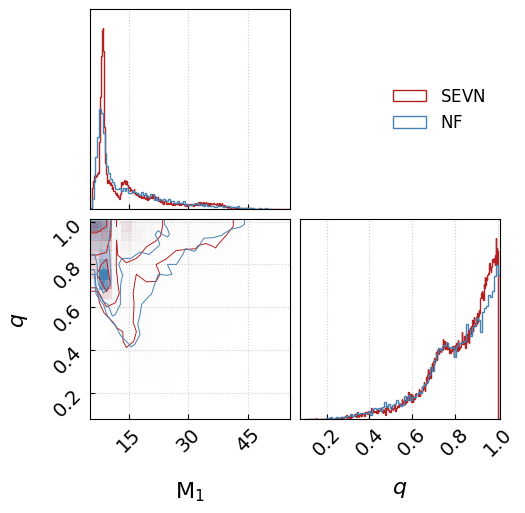

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


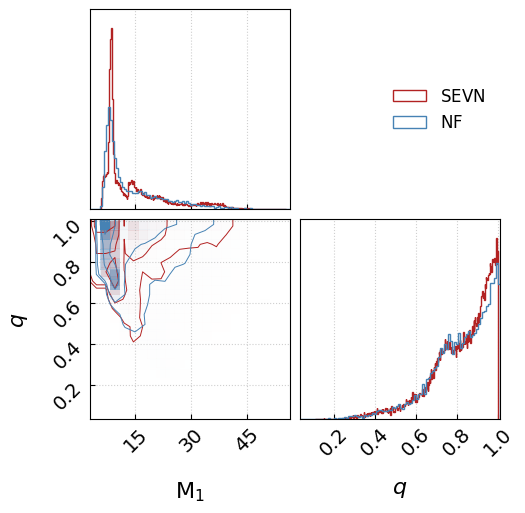

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


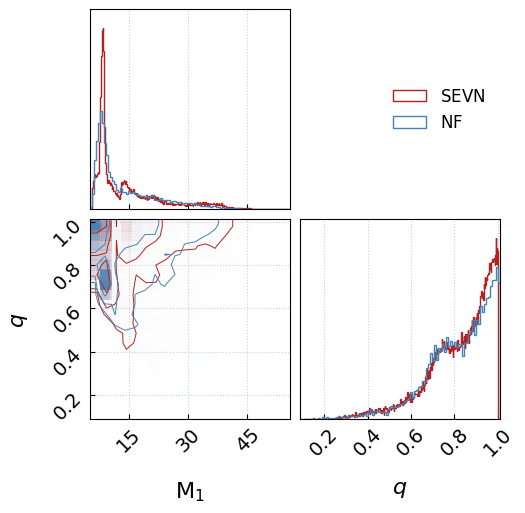

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


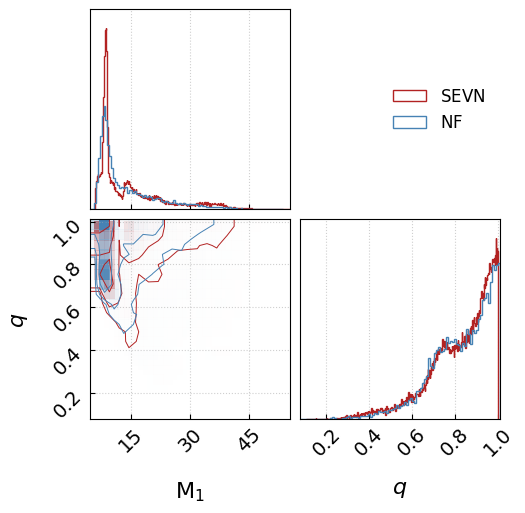

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


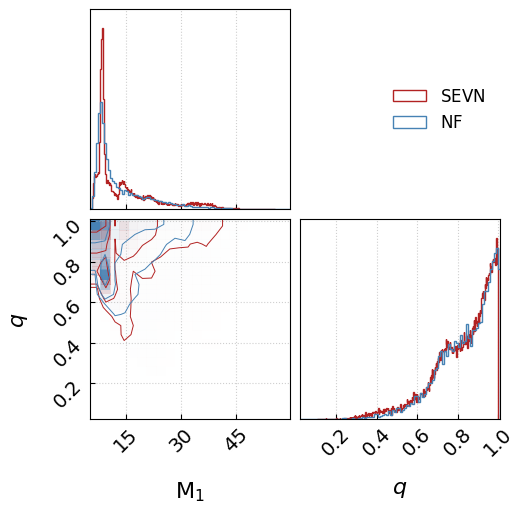

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


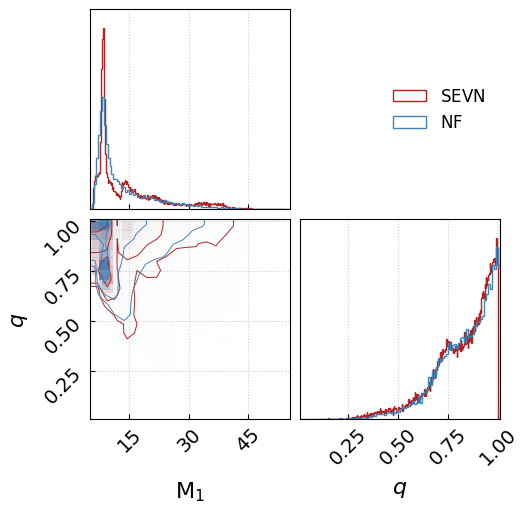

In [8]:
#looping over different alphas
alphas = np.geomspace(0.5, 5, 10)
alphas_SEVN =  [0.5, 1. , 3. , 5. ]
for alpha in alphas:
    df_NF = sample_run(r"D:\Black-Holes-Population-Studies\tuning\test\blocks_20_hidden_128_A_relu_N_300.json", hyperparams = [0.001, alpha], n_samples = 10000)
    samples_nf = transform_from_probit(np.array(df_NF[['Mass_0','q']]), np.array([[0,100],[0,1.01]]))
    samples_nf = samples_nf[np.isfinite(samples_nf[:,1])]
    fig = corner(samples_sevn, color = 'firebrick', hist_kwargs={'density':True, 'label': '$\\mathrm{SEVN}$'}, hist_bin_factor=int(np.sqrt(len(samples_sevn)))/20, labels = ['$\\mathrm{M}_1$', '$q$'], plot_density = True, no_fill_contours = True, plot_datapoints = False)
    fig = corner(samples_nf, color = 'steelblue', hist_kwargs={'density':True, 'label': '$\\mathrm{NF}$'}, hist_bin_factor=int(np.sqrt(len(samples_nf)))/20, labels = ['$\\mathrm{M}_1$', '$q$'], plot_density = True, no_fill_contours = True, plot_datapoints = False, fig = fig)
    fig.axes[1].legend(loc = 5, *fig.axes[0].get_legend_handles_labels())
    fig.savefig(f'M1_q_300_alpha_{alpha}.pdf', bbox_inches='tight')
    plt.show()



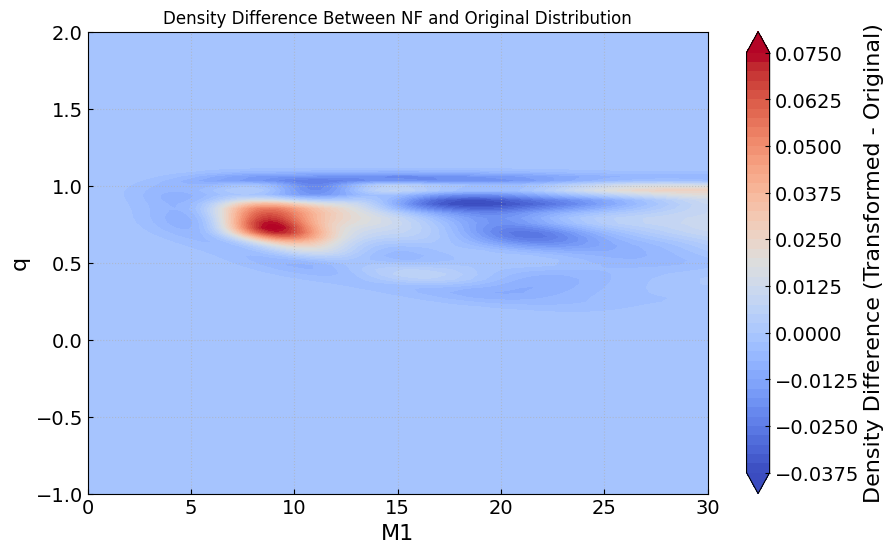

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde


original_samples = samples_sevn
transformed_samples = samples_nf

def compute_kde(samples, xgrid, ygrid):
    kde = gaussian_kde(samples.T)
    grid_coords = np.vstack([xgrid.ravel(), ygrid.ravel()])
    return kde(grid_coords).reshape(xgrid.shape)

x = np.linspace(0, 30, 100)
y = np.linspace(-1, 2, 100)
xgrid, ygrid = np.meshgrid(x, y)

original_density = compute_kde(original_samples, xgrid, ygrid)
transformed_density = compute_kde(transformed_samples, xgrid, ygrid)

plt.figure(figsize=(10, 6))
diff_density = transformed_density - original_density
plt.contourf(xgrid, ygrid, diff_density, levels=50, cmap='coolwarm', extend='both')
plt.colorbar(label='Density Difference (Transformed - Original)')
plt.xlabel('M1')
plt.ylabel('q')
plt.title('Density Difference Between NF and Original Distribution')
plt.grid(True)
plt.show()



In [11]:
import seaborn as sns
df_all = pd.concat([df_NF, df])
g = sns.jointplot(
    data=df_all,
    x="Mass_0", y="q",palette = "mako",
    kind="kde",xlim= (0,60), ylim= (0,2), alpha =0.7, levels = [0.1,0.5,0.7,0.9])

g.set_axis_labels('Mass 0', 'q', fontsize=12)


: 

: 

### Plotting Likelihood

D:/Black-Holes-Population-Studies\tuning\test\blocks_20_hidden_128_A_relu_N_1000.json


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


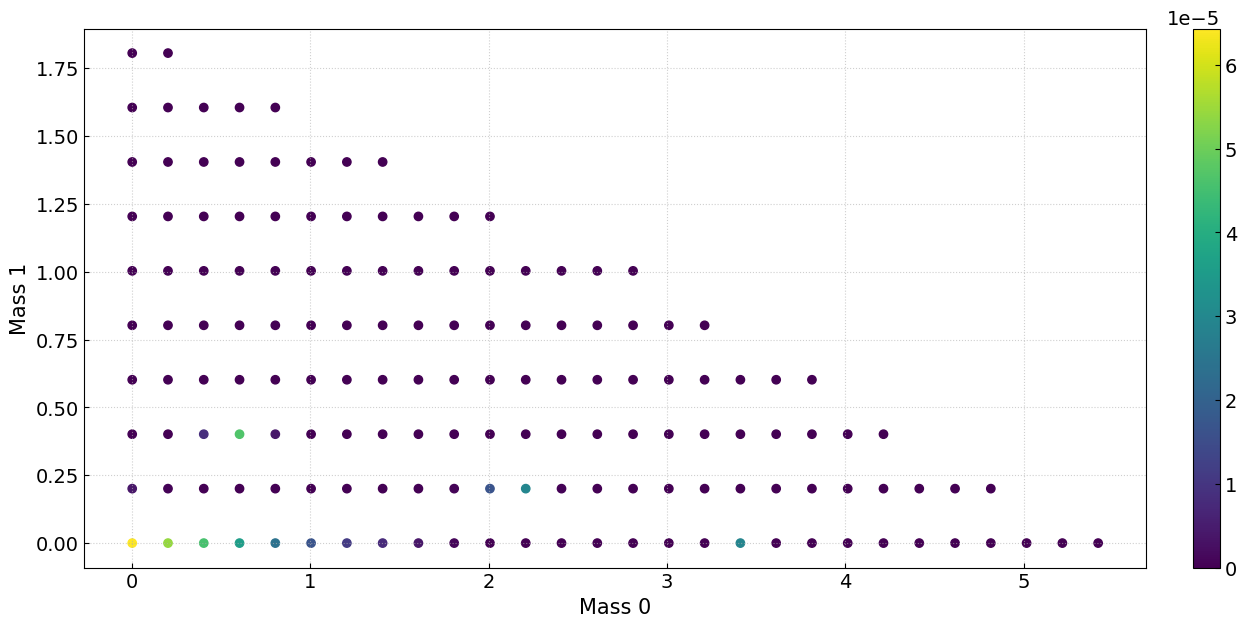

In [13]:
from tools.plotting import plot_likelihood
print(run_path)
plot_likelihood(get_run(run_path), hyperparams=[0.0004, 5])

### Exploring the conditional probibilty space

In [14]:
from tools.constants import data_path
import numpy as np
df = pd.read_parquet(r"D:\Black-Holes-Population-Studies\notebooks\BHBHm.pq")
Zs= df['Z'].unique()
alphas  = df['alpha'].unique()
SEVN_grid = np.meshgrid(Zs,alphas)
df

,Mass_0,Mass_1,Z,alpha,q
0,17.80632,15.805690,0.0001,0.5,0.887645
1,33.24870,25.701310,0.0001,0.5,0.773002
2,24.53676,20.099740,0.0001,0.5,0.819168
3,34.41521,25.073250,0.0001,0.5,0.728551
4,18.25818,7.264607,0.0001,0.5,0.397882
...,...,...,...,...,...
158996,10.57255,10.394180,0.0300,3.0,0.983129
158997,10.41027,9.384505,0.0300,3.0,0.901466
158998,7.55398,6.708311,0.0300,5.0,0.888050
158999,10.57255,10.394180,0.0300,5.0,0.983129


In [8]:
Zs, alphas

(array([0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.002 , 0.004 ,
        0.006 , 0.008 , 0.01  , 0.014 , 0.017 , 0.02  , 0.03  ]),
 array([0.5, 1. , 3. , 5. ]))

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


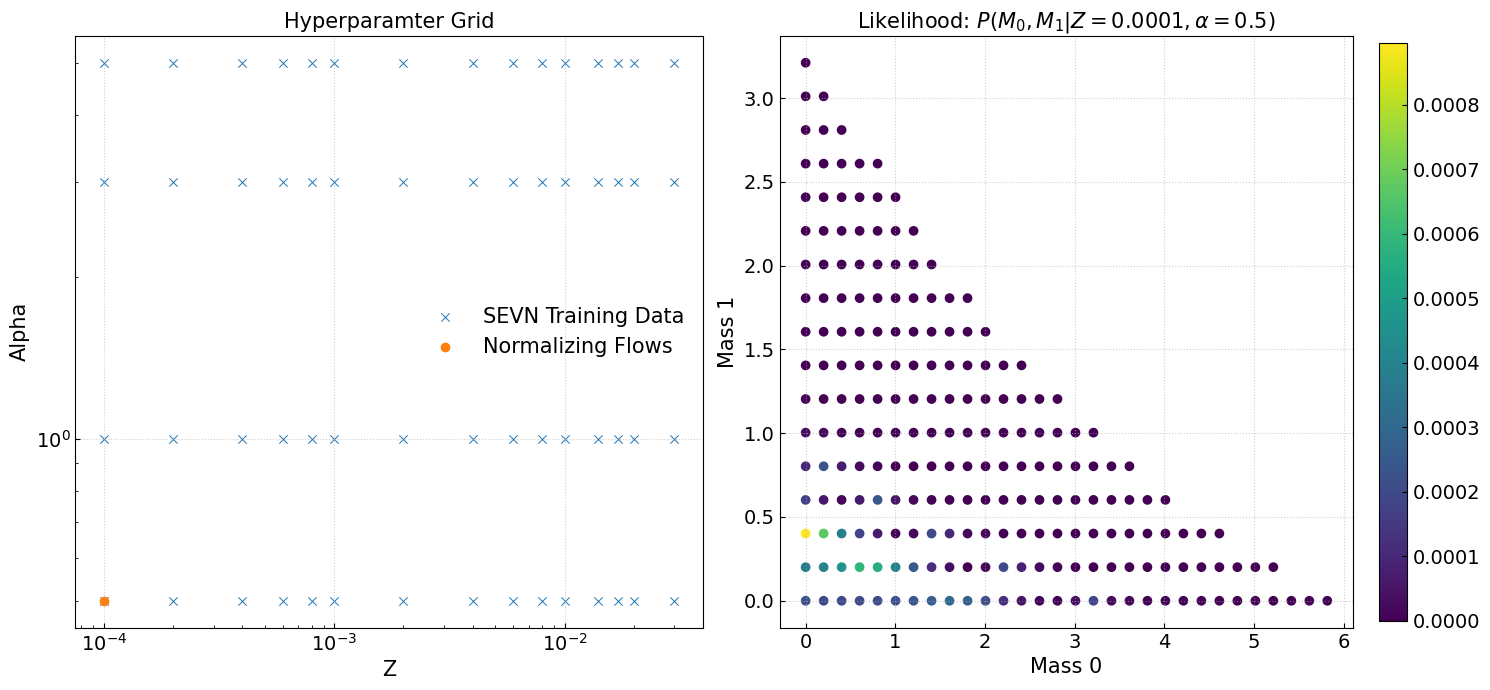

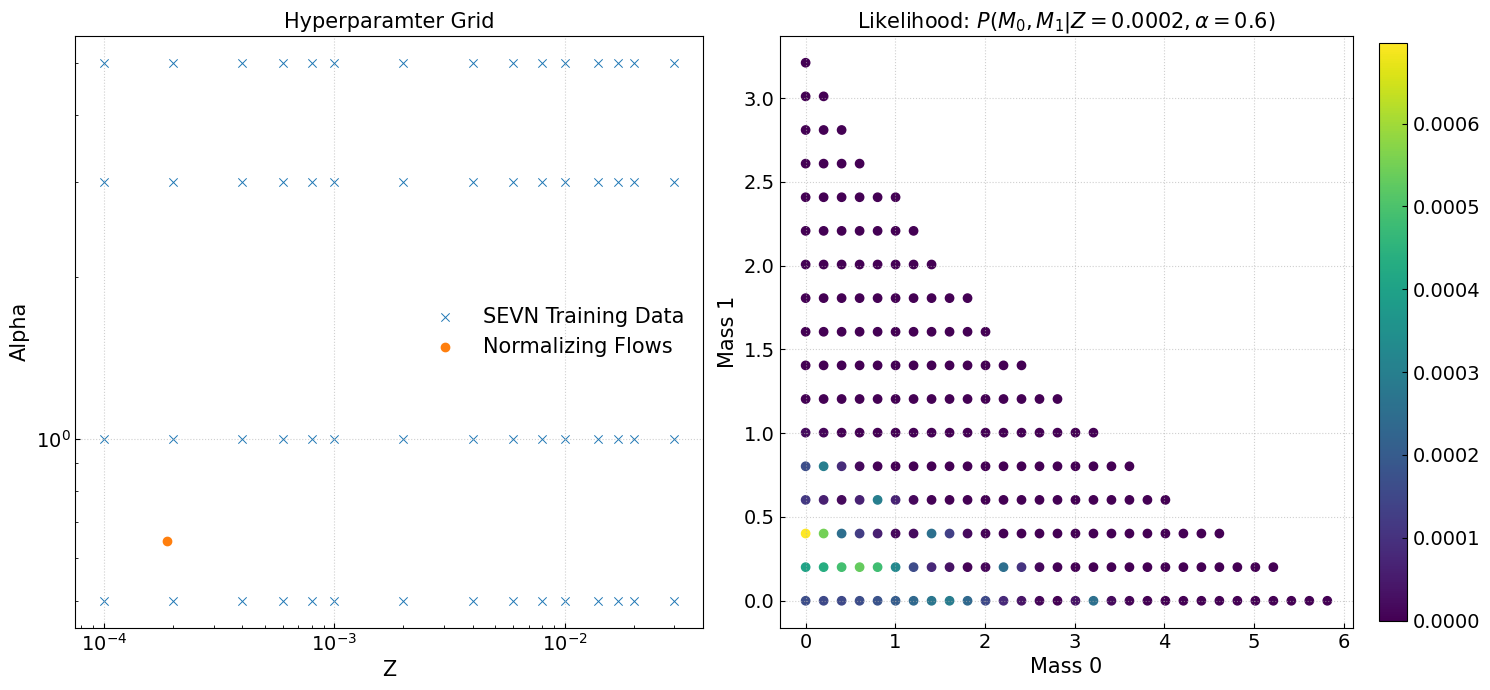

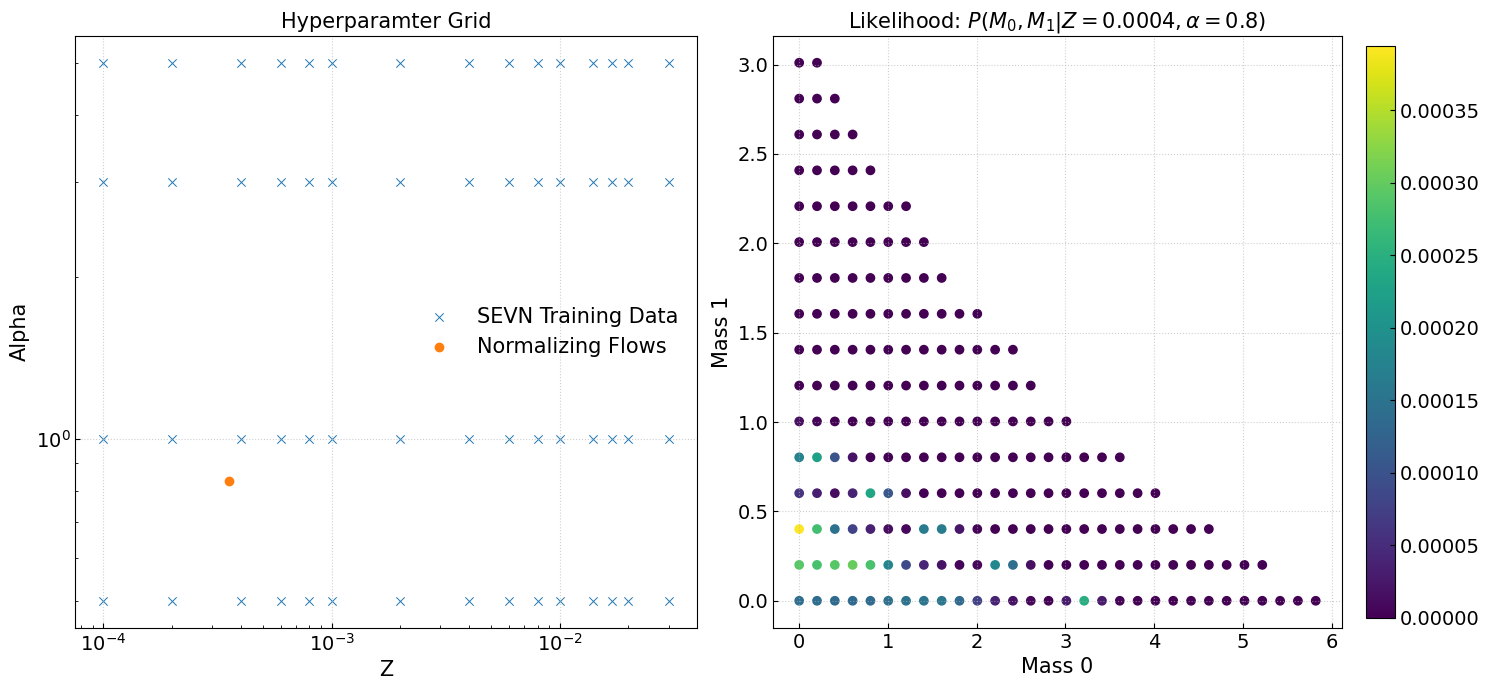

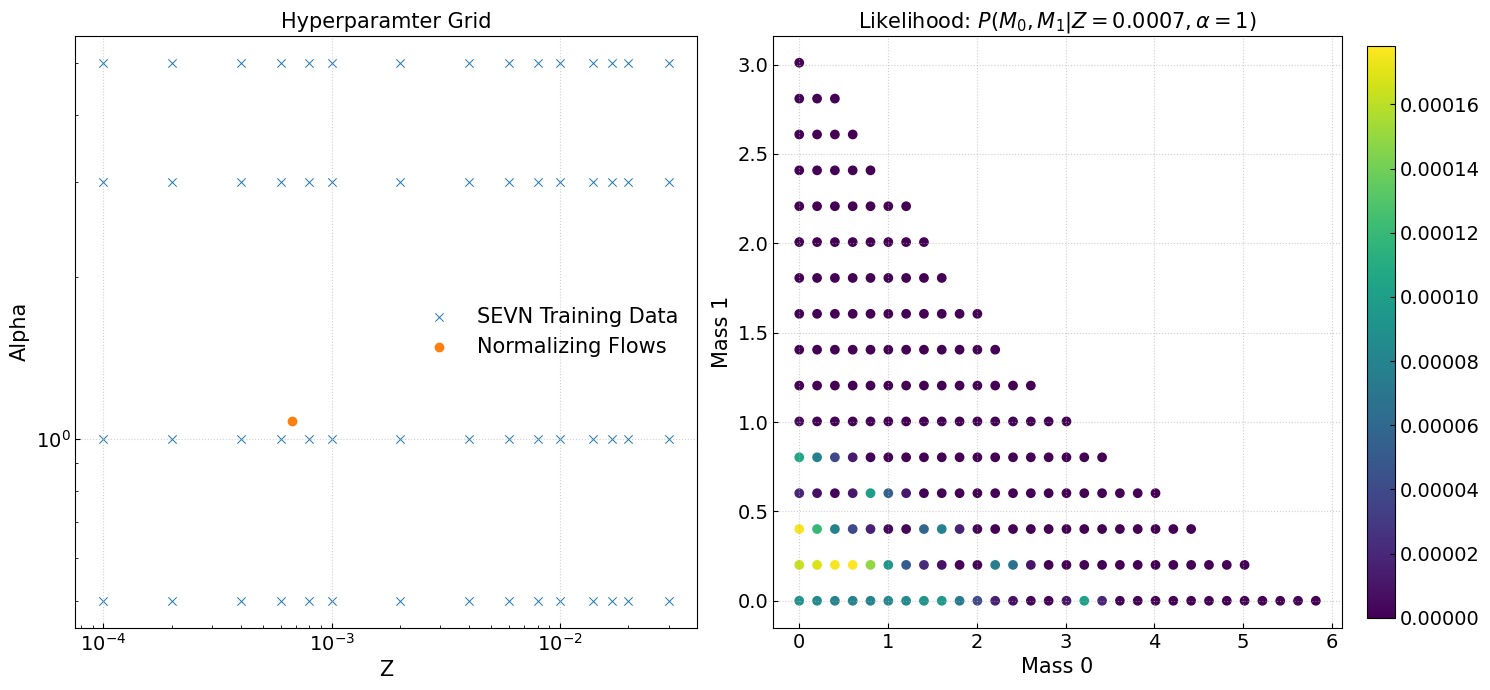

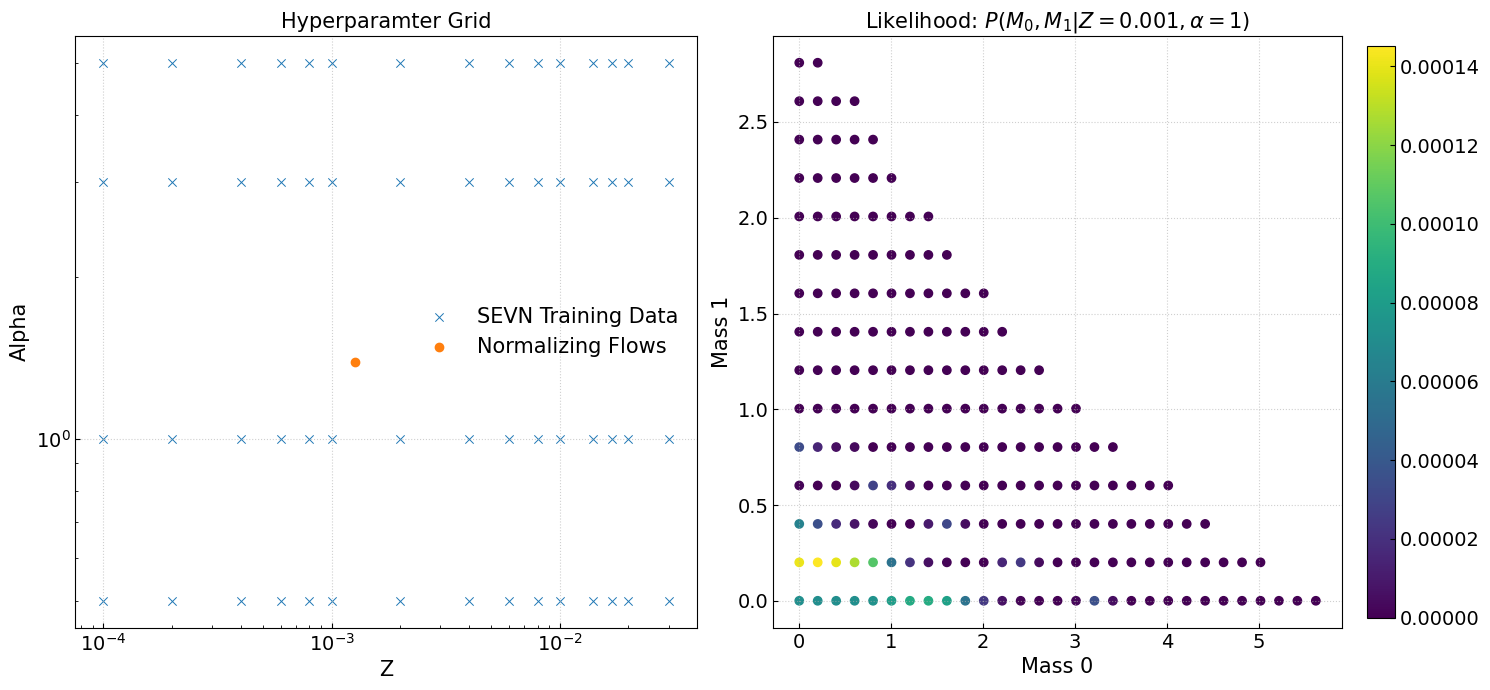

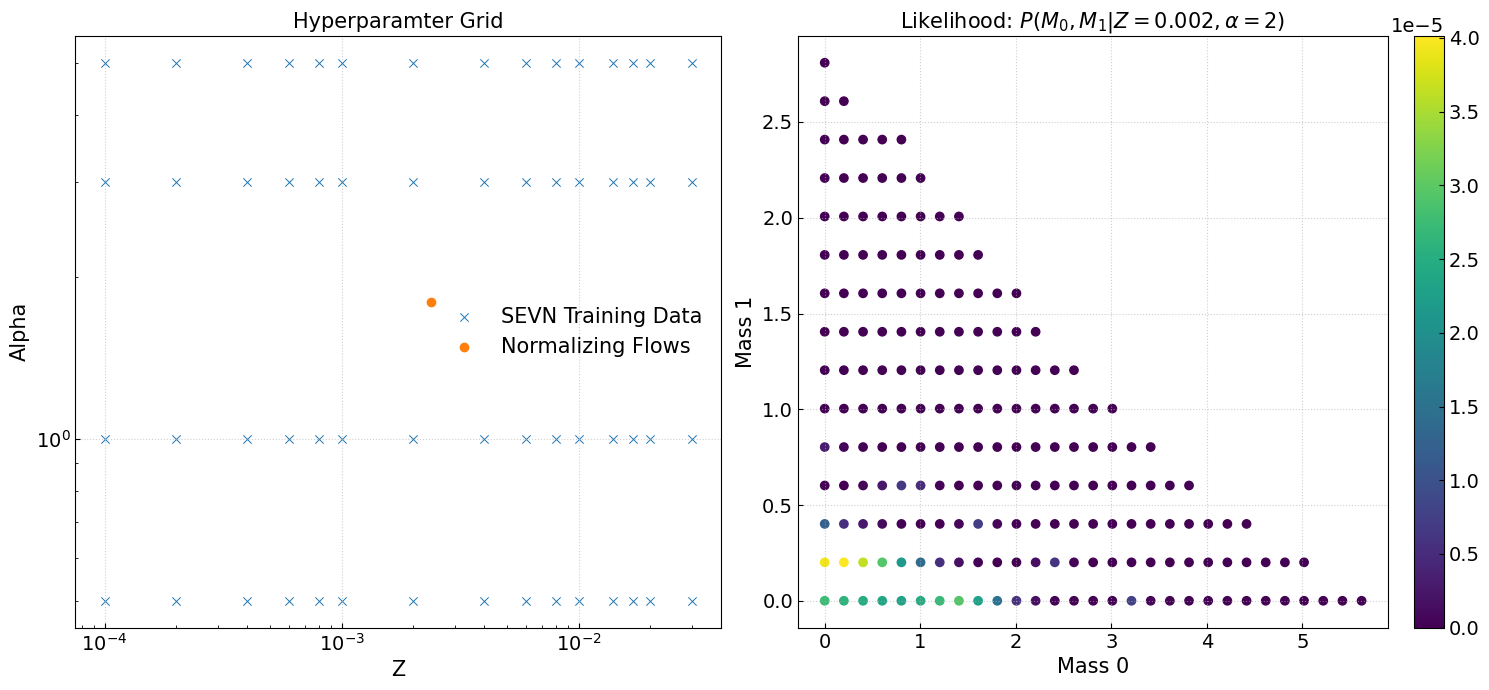

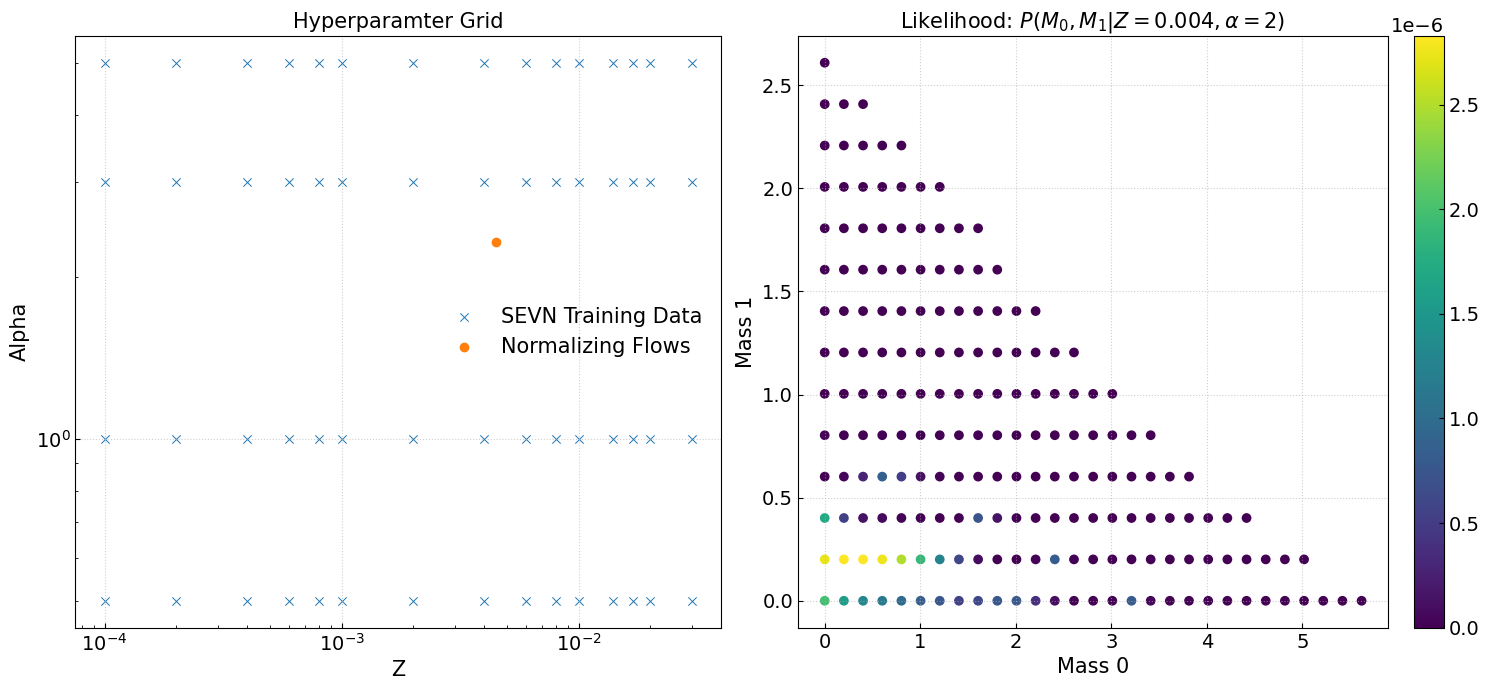

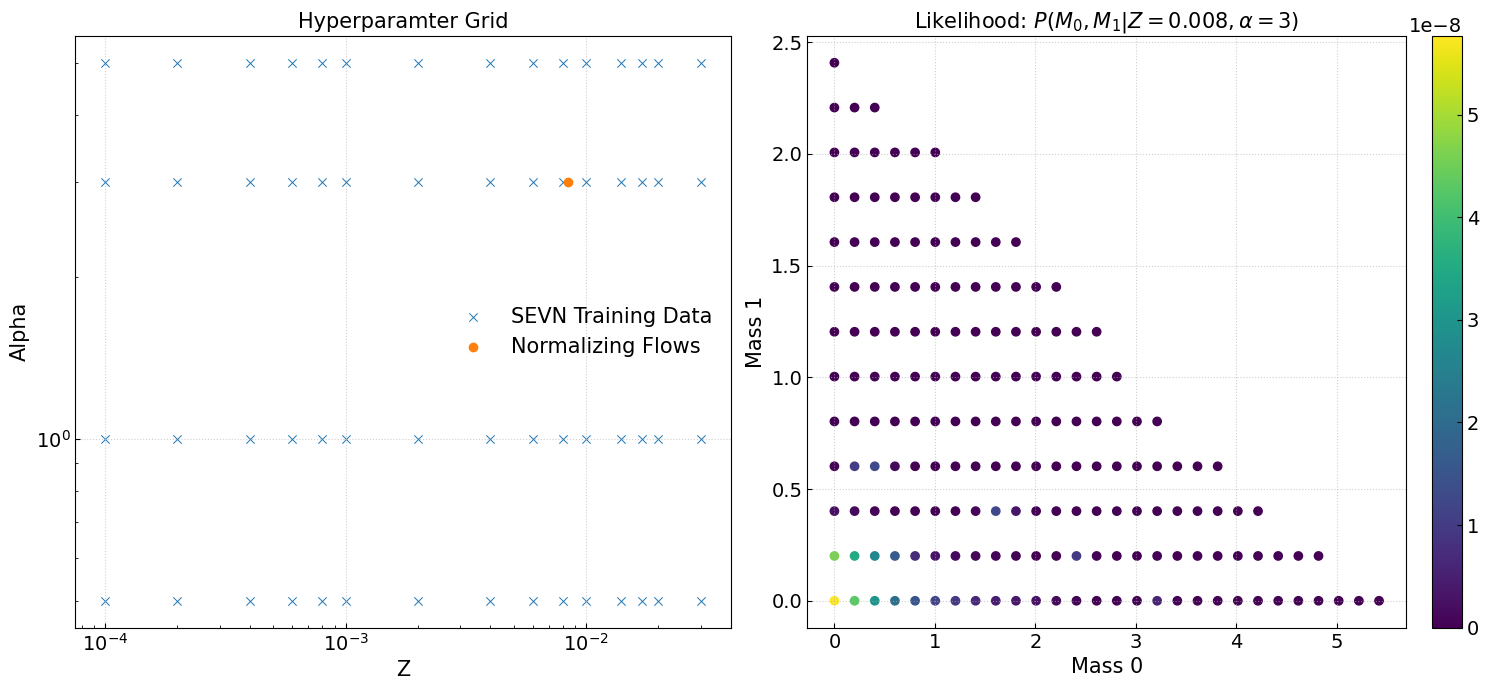

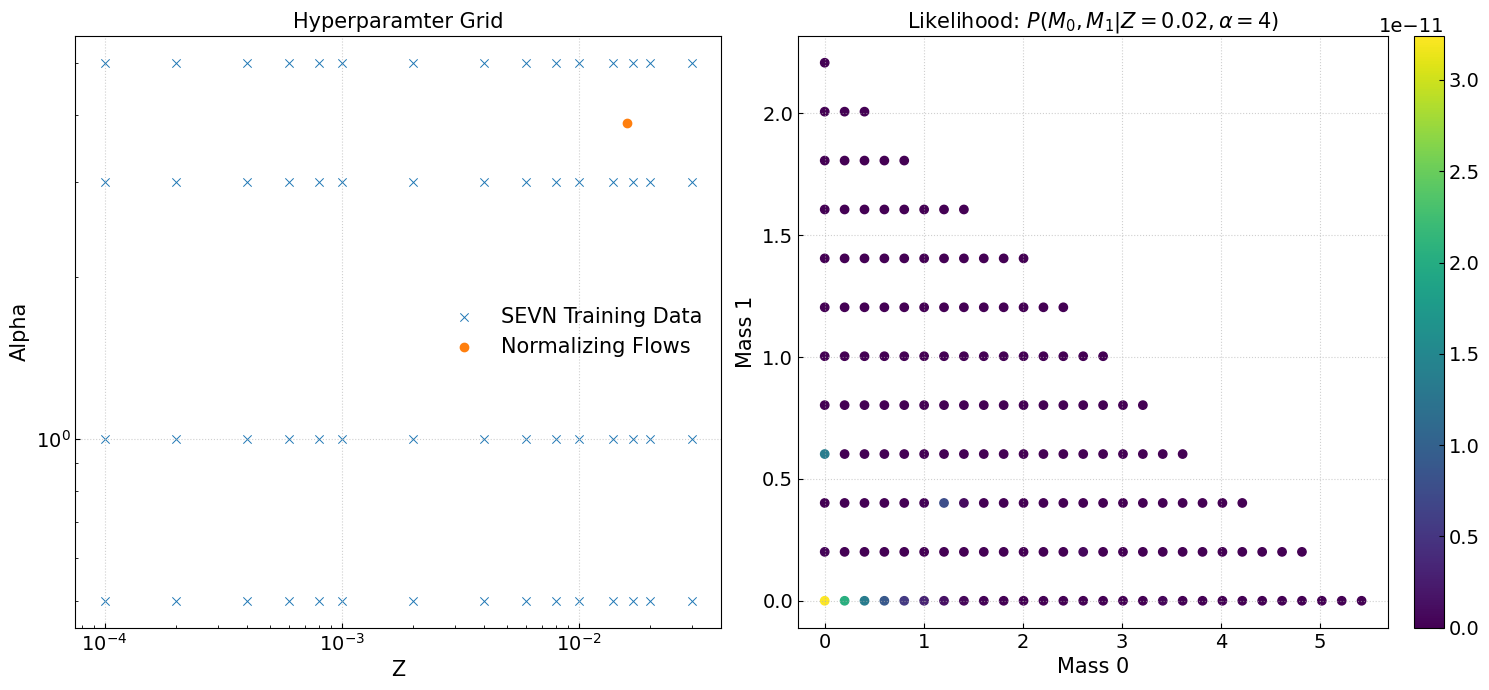

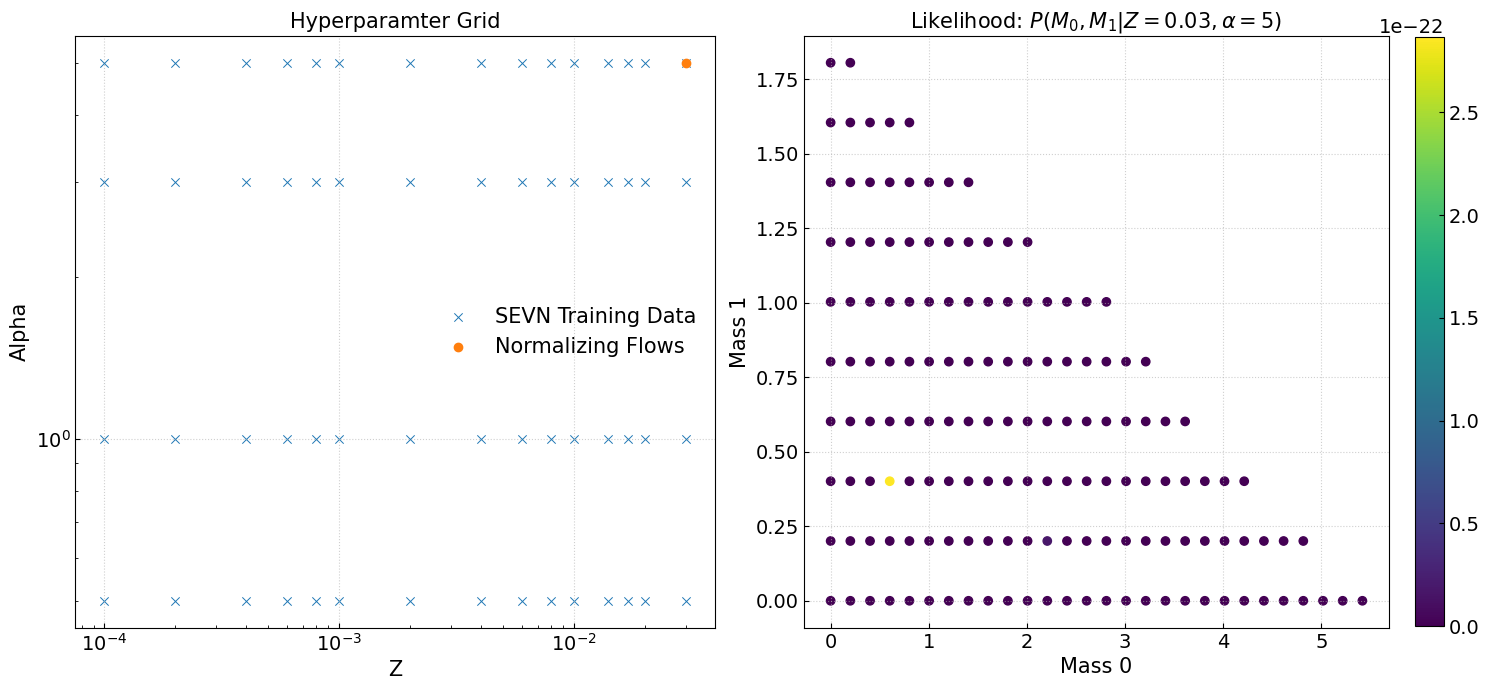

In [15]:
import matplotlib.pyplot as plt

Zs_= np.geomspace(0.0001, 0.03, 10)
alphas_ = np.geomspace(0.5, 5, 10)

i=1
for Z, alpha in zip(Zs_, alphas_):
    fig, ax = plt.subplots(figsize=(15,7), ncols=2)
    ax[0].scatter(SEVN_grid[0], SEVN_grid[1], marker ='x', label ='SEVN Training Data')
    ax[0].set_title("Hyperparamter Grid",  fontsize=15)
    ax[0].set_xlabel("Z", fontsize=15)
    ax[0].set_ylabel("Alpha", fontsize=15)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].tick_params(axis='both', labelsize=14)
    ax[0].grid(True)
    ax[0].scatter(Z,alpha, label='Normalizing Flows')
    ax[0].legend(fontsize=15)

    plot_likelihood(get_run(run_path), hyperparams=[Z, alpha], existing_ax=ax[1])
    ax[1].set_title(f'Likelihood: $P(M_0,M_1|Z={Z:.1g},\\alpha={alpha:.1g})$',  fontsize=15)
    plt.tight_layout()
    plt.savefig(f'../{i}.png')
    plt.show()
    i+=1
